## Market basket analysis On Groceries Data

Market basket analysis is a technique used mostly by retailers to identify which products clients purchase together most frequently. This involves analyzing point of sale (POS) transaction data to identify the correlations between different items according to their co-occurrence in the data. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

In this Notebook we implemented market basket analysis on a retail dataset for groceries using the apriori algorithm and association rules.

After Basis Data cleaning and visualigation. We have created the Market basket. Before the final step in market basket building, in the data preparation stage we removed all invoices that have only one item. Since we’re analyzing items bought together, a single-item invoice will be of no use to us.

#### Applying the apriori algorithm-

In this section, we will apply the apriori algorithm to find the most frequently purchased items in the dataset. For our minimum support value, we will specify 3%, which means only items whose frequency of occurrence in the data is at least 3% will be returned.

#### Applying association rules-

The final step in our analysis is to generate the rules with their corresponding support, confidence, and lift. From this, we can then extract useful information about which items are more likely to be purchased together.

In [2]:
#Import all relevant libraries

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Loading dataset
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df.duplicated().sum()

759

In [7]:
# Converting Date column into correct datatype which is datetime

df.Date = pd.to_datetime(df.Date)
df.memberID = df['Member_number'].astype('str')
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\ProgramData\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



### Data Visualization



In [8]:
#Number of Sales Weekly
weekly_sales = df.resample('w', on='Date').size()

fig = px.line(df, x=weekly_sales.index, y=weekly_sales,  labels={'x': 'Date','y': 'Number of total Sales'})

#fig.update_layout(title_text='Number of Sales Weekly', title_x=0.5, title_font=dict(size=18)) 
fig.show()

In [212]:
#Weekly unique customers 

unique_guests_per_week= df.resample('w', on='Date').Member_number.nunique()
fig = px.line(unique_guests_per_week, x=unique_guests_per_week.index, y=unique_guests_per_week,
              labels={'x'"'Date',"'y': 'Number of Customers'})
fig.show()

In [167]:
# Top sellers: Top 6 sold items with their counts

df.groupby(['itemDescription']).itemDescription.count().reset_index(name='count').sort_values(by='count',ascending=False).head(6)

,itemDescription,count
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071


In [59]:
#TreeMap for Frequency of the items sold

Frequency_of_items = df.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['itemDescription'], values='count')

fig.update_layout(title_text='Frequency of the Items Sold', title_x=0.5, title_font=dict(size=18))

fig.update_traces(textinfo="label+value")
fig.show()


In [128]:
# MemberIDs who bought the most items

x=df.groupby(['Member_number']).Member_number.size().sort_values(ascending=False).reset_index(name='count')
x

,Member_number,count
0,3180,36
1,3737,33
2,3050,33
3,2051,33
4,2271,31
...,...,...
3893,4451,2
3894,3990,2
3895,2213,2
3896,2852,2


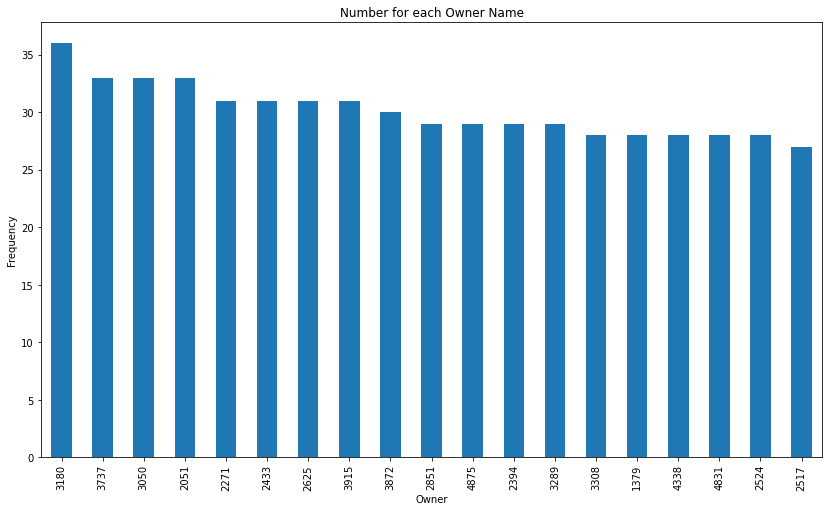

In [127]:
# Top 19 Customers in terms of Number of Items Bought

ax = df.groupby(['Member_number']).Member_number.count().sort_values(ascending=False).head(19).plot.bar(title="Number for each Owner Name", figsize=(14,8))
_ = ax.set_xlabel('Owner')
_ = ax.set_ylabel('Frequency')

### Creating Basket

In [195]:
basket = df.groupby(['Member_number', 'itemDescription']).itemDescription.count().unstack().reset_index()
basket.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [198]:
# Filling all null values with 0
basket.fillna(0,inplace=True)

In [199]:
#Making Member_number as index
basket=basket.set_index('Member_number').head(4)

In [201]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
# Encoding the items that sold more than 1
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

In [203]:
basket_enc = basket.applymap(one_hot_encoder)
basket_enc.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
basket_enc_filter=basket_enc[(basket_enc> 0).sum(axis=1)>=2]
basket_enc_filter

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#frequent_itemsets = apriori(basket_enc, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support', ascending=False)
#frequent_itemsets.head(25)

#Generate the frequent itemsets
frequent_itemsets = apriori(basket_enc_filter, min_support=0.03, use_colnames=True,max_len=4).sort_values("support",ascending=False)
frequent_itemsets.head(10)

,support,itemsets
18,0.75,(sausage)
26,0.75,(whole milk)
464,0.50,"(soda, whole milk, sausage)"
146,0.50,"(soda, whole milk)"
136,0.50,"(soda, sausage)"
20,0.50,(soda)
139,0.50,"(whole milk, sausage)"
15,0.50,(rolls/buns)
124,0.50,"(sausage, rolls/buns)"
687,0.25,"(soda, semi-finished bread, canned beer, pickl..."


In [210]:

#Apply association rules-for indicating astecedent and consequent items
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(soda, sausage, rolls/buns)",(whipped/sour cream),0.25,0.25,0.25,1.0,4.0,0.1875,inf
1,"(other vegetables, tropical fruit, frozen vege...",(sugar),0.25,0.25,0.25,1.0,4.0,0.1875,inf
2,"(hygiene articles, salty snack, pickled vegeta...",(misc. beverages),0.25,0.25,0.25,1.0,4.0,0.1875,inf
3,"(hygiene articles, salty snack, misc. beverages)",(pickled vegetables),0.25,0.25,0.25,1.0,4.0,0.1875,inf
4,(frozen vegetables),"(sugar, other vegetables, tropical fruit)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
...,...,...,...,...,...,...,...,...,...
9767,"(whole milk, sausage)",(rolls/buns),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
9768,(rolls/buns),"(whole milk, sausage)",0.50,0.50,0.25,0.5,1.0,0.0000,1.0
9769,"(soda, whole milk)",(rolls/buns),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
9770,(rolls/buns),"(soda, whole milk)",0.50,0.50,0.25,0.5,1.0,0.0000,1.0
